# Blob Classification with Tensorflow

In [1]:
# This tutorial will give you a basic introduction for using machine learning for a classification problem
# Source code for this was largely from the following github repo:
# https://github.com/soerendip/Tensorflow-binary-classification/blob/master/Tensorflow-binary-classification-model.ipynb

## Import Libraries - Data Processing and Visualization

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

## Import Libraries - Vanilla Tensorflow

In [3]:
# Using vanilla tensorflow will allow for a lower level creation of a model
# However, this means that the code will be more verbose

In [4]:
# Can reduce load time by loading in specific modules
import tensorflow as tf


### Define constants for the script

In [5]:
# Hyperparamters for training
LEARNING_RATE = 0.0001
NUM_EPOCHS = 1000
BATCH_SIZE = 1
DISPLAY_STEP = 50


# Network Parameters; nodes per layer
n_input = 2
n_hidden_1 = 10 
n_hidden_2 = 10
n_hidden_3 = 10

# Output Num Classes
n_classes = 2 # Number of classes to predict

In [6]:
# Get the data for the classification problem
# Use of a library method that allows us to get a random distribution of X group of points (blobs)

In [7]:
data = make_blobs(n_samples=200,n_features=2,centers=2,random_state=101)

In [8]:
# What the data consists of
data[0][:5] # X and Y coordinates

array([[-10.26167723,  -7.06350819],
       [ -2.40902204,   2.93591385],
       [ -7.76150458,  -5.08941917],
       [-11.14547808,  -5.21952108],
       [-10.51163375,  -6.56992184]])

In [9]:
data[1][:5] # Class label


array([1, 0, 1, 1, 1])

In [10]:
# Store the X and Y coordinates so they can be visually seen afterwards
features = data[0]

### Visualization of the problem

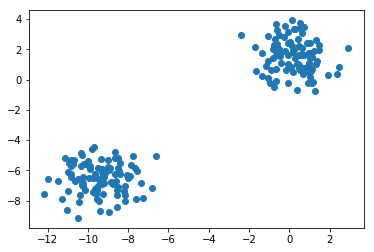

In [11]:
%matplotlib inline
plt.scatter(features[:,0],features[:,1])

In [12]:
# get the class labels for the 2 groups of Blobs shown above
labels = data[1]
Y = np.array([labels, -(labels-1)]).T


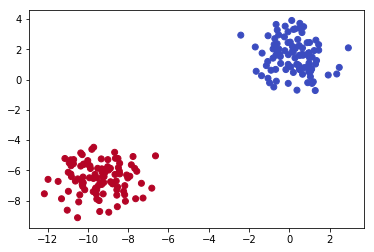

In [13]:
plt.scatter(features[:,0],features[:,1], c=labels,cmap='coolwarm')

### Setting up for Machine Learning

In [14]:
# We begin with splitting the data into a train and test distribution, this is used to validate training progress
xtrain, xtest, ytrain, ytest = train_test_split(features, Y, test_size=0.2, random_state=101)
print(len(xtrain)) # how many training samples
print(len(xtest)) # how many validation samples

160
40


In [15]:
xtrain.shape

(160, 2)

In [16]:
### Tensorflow Model for Training

In [17]:
# Input for the tf Graph

x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [18]:
# Create the model

def feedforward_network(x, weights, biases):
    # Hidden Layer 1 - Relu Activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Hidden Layer 2 - Relu Activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Hidden Layer 3 - Relu Activation
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
    
    output_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return output_layer


In [19]:
# Store Weights and bias terms for training
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_hidden_3, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [20]:
# Construct model with function call
pred = feedforward_network(x, weights, biases)

In [21]:
# Define the loss and optomizer for the graph
# reduce mean is to average the values
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred,labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

In [22]:
# Launch the graph to begin training
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(NUM_EPOCHS):
        
        _, c = sess.run([optimizer, cost], feed_dict={x: xtrain,
                                                          y: ytrain})
        # Display logs per epoch step
        if epoch % DISPLAY_STEP == 0:
            print("Epoch:", '%04d' % (epoch), "cost=", "{:.9f}".format(c))
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x: xtest, y: ytest}))
    global result 
    result = tf.argmax(pred, 1).eval({x: xtest, y: ytest})

Epoch: 0000 cost= 8.816997528
Epoch: 0020 cost= 8.544069290
Epoch: 0040 cost= 8.275898933
Epoch: 0060 cost= 8.012763023
Epoch: 0080 cost= 7.753320217
Epoch: 0100 cost= 7.494319916
Epoch: 0120 cost= 7.234326363
Epoch: 0140 cost= 6.977679253
Epoch: 0160 cost= 6.723337650
Epoch: 0180 cost= 6.470004082
Optimization Finished!
Accuracy: 0.5


In [23]:
result[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [24]:
xtest[:5]

array([[-8.87772115, -6.76007802],
       [-7.67850105, -5.87402015],
       [ 0.88674196,  2.43816202],
       [-8.17757184, -7.61791421],
       [-0.97850975, -0.21957226]])

In [25]:
ytest[:5]

array([[1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1]])

## Validating the training

In [26]:
# now we want to determine if the model is accurate by testing it out on some new data

In [27]:
a,b,c = xtest[:,0], xtest[:,1], result

In [28]:
assert (a.shape == b.shape == c.shape)
print("X, Y and Labels are all of same shape.")

X, Y and Labels are all of same shape.


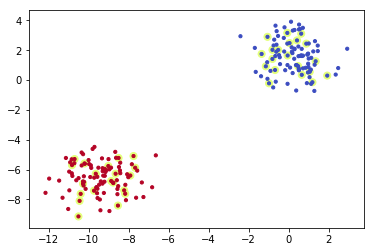

In [29]:
plt.scatter(a,b,s=50,c=c,cmap='Wistia')
plt.scatter(features[:,0],features[:,1], s=10,c=labels,cmap='coolwarm')
plt.show()

In [ ]:
# If you play around with the values for learning rate and num epochs, you can see the colors highlighted change
# color, this is due to the netowrk not being trained well so the predictions that it makes are not correct.
# In my version, the 2 groups with colors Orange and Yellow are in the 2 disctinct regions!

## Congragulations on Completing your first ANN using Tensorflow!